I will start with a chatgpt-generated example

| x	| y |
| :-: | :-: |
| 1	| 3 |
| 2	| 5 |
| 3	| 7 |
| 4	| 9 |
| 5	| 11 |

We want to find a line y = mx + b that best fits this data. 

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5]).reshape((-1, 1)) # model.fit expects a 2D array, hence the array reshape

Y = np.array([3,5,7,9,11])

model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

LinearRegression()

In [6]:
X_Unknown = np.array([6]).reshape((-1, 1))
model.predict(X_Unknown)

array([13.])

In [7]:
# Print the slope (m) and y-intercept (b) of the line
print('Slope (m): ', model.coef_)
print('Y-intercept (b): ', model.intercept_)

Slope (m):  [2.]
Y-intercept (b):  0.9999999999999982


In other words, `y = 2x + 1`

In [8]:
# Predict Y for X = 15
predicted_Ys = model.predict([[15]]) # note that the predict method expects a 2D array-like object as input, hence the double square brackets
predicted_Ys[0]

31.000000000000007

Which is true: `2*15 + 1 = 31` !

Normally we split the data into training and testing sets. Here I will just add a test data set, and then calculate R squared.

In [9]:
X_test = np.array([1.2,2.4,3.1,4.9,5.3]).reshape((-1, 1))
y_test = np.array([4,6,8,10,12])

# Predict the output on the test set
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, Y)
print('R Squared:', r2)

R Squared: 0.875


In [10]:
X_test

array([[1.2],
       [2.4],
       [3.1],
       [4.9],
       [5.3]])

*R squared is the coefficient of determination*. The best possible score is 1.0. 0 means that there's no correlation between the data and the model.

### The following is just to show the data behind that R2. 

In [11]:
# to show the y_pred array next to the y_test array
for i in range(len(y_pred)):
    print('Predicted: ', y_pred[i], 'Actual: ', y_test[i])

Predicted:  3.3999999999999986 Actual:  4
Predicted:  5.799999999999999 Actual:  6
Predicted:  7.2 Actual:  8
Predicted:  10.8 Actual:  10
Predicted:  11.6 Actual:  12


## Next I wanted to plot this. 

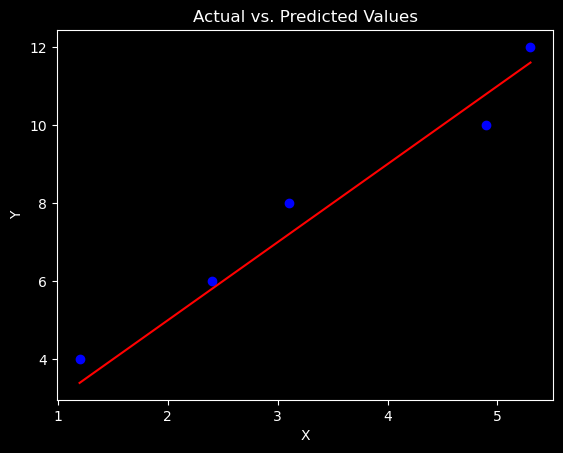

In [12]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(X_test, y_test, color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Actual vs. Predicted Values")
plt.plot(X_test, y_pred, color='red')

plt.show()

## and now from **scratch**

In [13]:
from typing import Tuple
from scratch.linear_algebra import Vector
from scratch.statistics import correlation, standard_deviation, mean

def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    """
    Given two vectors x and y,
    find the least-squares values of alpha and beta
    """
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

alpha, beta = least_squares_fit(X_test, y_test)
print('alpha: ', alpha, 'beta: ', beta)

alpha:  [1.86392942] beta:  [1.8154055]


`alpha = 1` and `beta = 2` means that `2x + 1 = y`. Say x = 5, then y = 11.

In [21]:
alpha

array([1.86392942])

to make a line from a np array, I should first concatenate alpha with zero.

In [25]:
import numpy as np

xs = np.concatenate(([0],alpha))
ys = np.concatenate(([0],beta))
ys

array([0.       , 1.8154055])

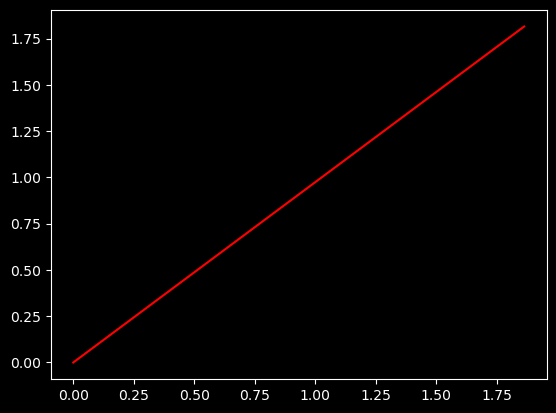

In [26]:
plt.plot(xs, ys, color='red')

plt.show()

That's not the function though.

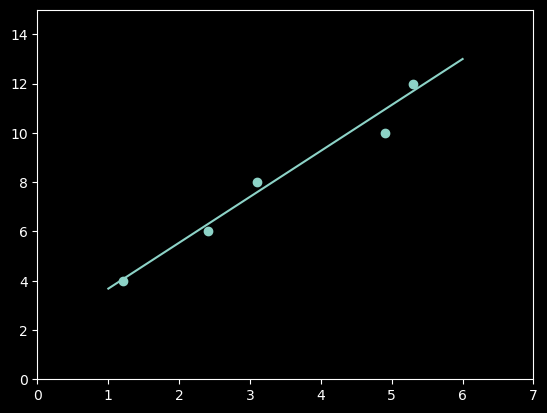

In [67]:
# Instead, define the function with x and y, and plt.plot(x,y)

# first, generate some x's 
x = [_+1 for _ in range(int(np.max(X_test)+1))]

y = alpha * x + beta 

plt.plot(x,y)
plt.axis([0,7,0,15])  # otherwise the y axis starts at beta - not how it does x and y as two coordinates each
plt.scatter(X_test, y_test)
plt.show()

Note that `int(np.max(X_test))` is numpy's function to determine the max of the X_test datapoints, so I could set the length of both axes. 

In [68]:
from scratch.simple_linear_regression import sum_of_sqerrors, total_sum_of_squares

def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    """
    the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model
    """
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) /
                  total_sum_of_squares(y))
    
r_squared(alpha, beta, X_test, y_test)

array([0.97124194])